<a href="https://colab.research.google.com/github/Paolino1994/Soda-/blob/master/Examen_Final_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torch import Tensor
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

# Punto 1
Descargar el dataset desde el siguiente link. Entrenar el modelo propuesto a continuación de este enunciado. El modelo está haciendo underfitting, overfitting o un fit correcto. ¿Por qué? Explicar el procedimiento realizado.


In [ ]:
ds=pd.read_csv("drive/MyDrive/dataset_1.csv")
ds = ds.rename(columns = {'# X':"X", "Y":"y"})

In [ ]:
ds.head()

,X,y
0,1.791979,4.952906
1,0.846885,1.424248
2,1.000300,0.454364
3,1.884188,6.681510
4,0.889089,1.211691


In [ ]:
X = ds[["X"]]
Y = ds[["y"]]

In [ ]:
random_state=65

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, random_state=random_state)
X_train=np.array(X_train).flatten()
X_test=np.array(X_test).flatten()
Y_train=np.array(Y_train).flatten()
Y_test=np.array(Y_test).flatten()

In [ ]:
learningRate=0.0001
epochs=300
w1=0
w2=0
bias=0
errorList=[]
validErrorList=[]

In [ ]:
for epoch in range(epochs):
  currentError=0
  epochError=0
  for element in range(len(X_train)):
    x=X_train[element]
    y=Y_train[element]
    #Forward
    x1, x2, x3 = x, x**2, x**3
    pred=w1*x3 + w2*x2 + w1*x1 + bias
    error = y - pred
    #print(x,y,x1, x2, x3,w1,w2)
    epochError = epochError+error**2
    

    
    
    #Back
    d_prediction = - 2 * error
    w1_loss = (d_prediction * (x3 + x1)).sum(axis=0)
    w2_loss = (d_prediction * x2).sum(axis=0)
    bias_loss = d_prediction.sum(axis=0)

    

    #Weight
    w1 -= learningRate * w1_loss 
    w2 -= learningRate * w2_loss 
    bias -= learningRate * bias_loss 

  #Validation
  validError=0
  for element in range(len(X_test)):
    xT=X_test[element]
    yT=Y_test[element]
    x1, x2, x3 = xT, xT**2, xT**3
    pred=w1*x3 + w2*x2 + w1*x1 + bias
    error = yT - pred
    validError = validError+error**2

  validErrorList.append(validError/len(X_test))
  errorList.append(epochError/len(X_train))
  print(f"Epoch {epoch} error {errorList[-1]} valid error {validErrorList[-1]}")


    


Epoch 0 error 0.771982807541607 valid error 0.5964488313947218
Epoch 1 error 0.5856022942119175 valid error 0.5768729532367709
Epoch 2 error 0.5744097557550619 valid error 0.5699397914961648
Epoch 3 error 0.5701628353622279 valid error 0.566743310852872
Epoch 4 error 0.5679095499761186 valid error 0.5647082354155423
Epoch 5 error 0.5662521758534642 valid error 0.5630713134830193
Epoch 6 error 0.5647937533287362 valid error 0.5615966159589829
Epoch 7 error 0.5634200296090396 valid error 0.5602061488865093
Epoch 8 error 0.562097104291428 valid error 0.5588714963523564
Epoch 9 error 0.5608141771703455 valid error 0.5575809326101244
Epoch 10 error 0.5595672309463476 valid error 0.556328885750394
Epoch 11 error 0.558354318557226 valid error 0.5551122925356676
Epoch 12 error 0.5571741698012919 valid error 0.5539292130027778
Epoch 13 error 0.5560257627291212 valid error 0.5527782507746652
Epoch 14 error 0.5549081833630377 valid error 0.5516582897484968
Epoch 15 error 0.5538205756030734 valid 

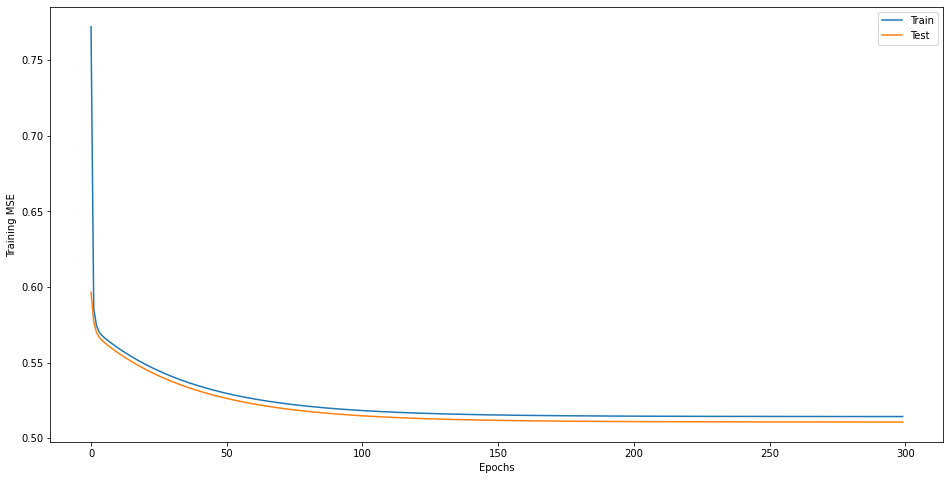

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(errorList, label='Train')
plt.plot(validErrorList, label='Test')
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.legend()
plt.show()

En este caso estamos seguros que nuestro modelo no have overfitting ya que la loss de nustro test nunca vuelve a ascender, podemos revisar cuales son los resultados para comparar con nuestro Y original

In [ ]:
x1, x2, x3 = X_test, X_test**2, X_test**3
predTest=w1*x3 + w2*x2 + w1*x1 + bias

x1, x2, x3 = X_train, X_train**2, X_train**3
predTrain=w1*x3 + w2*x2 + w1*x1 + bias

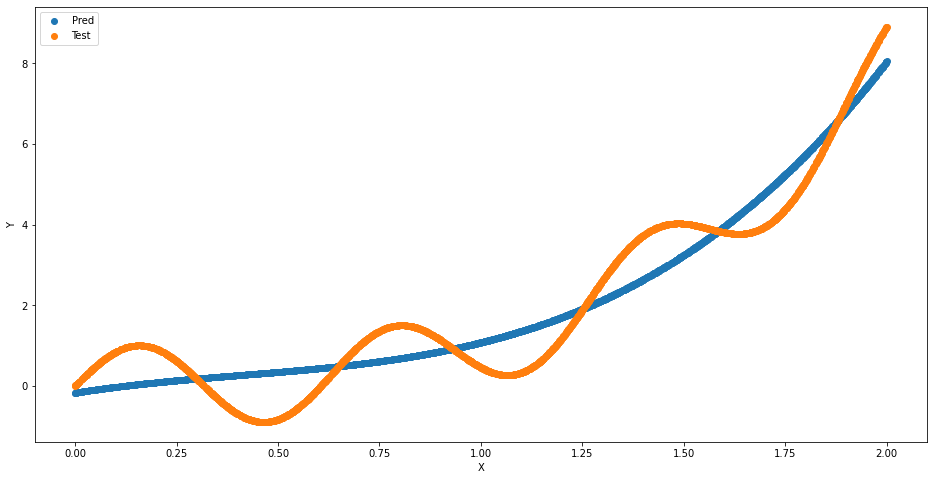

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(X_test,predTest, label='Pred')
plt.scatter(X_test,Y_test, label='Test')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

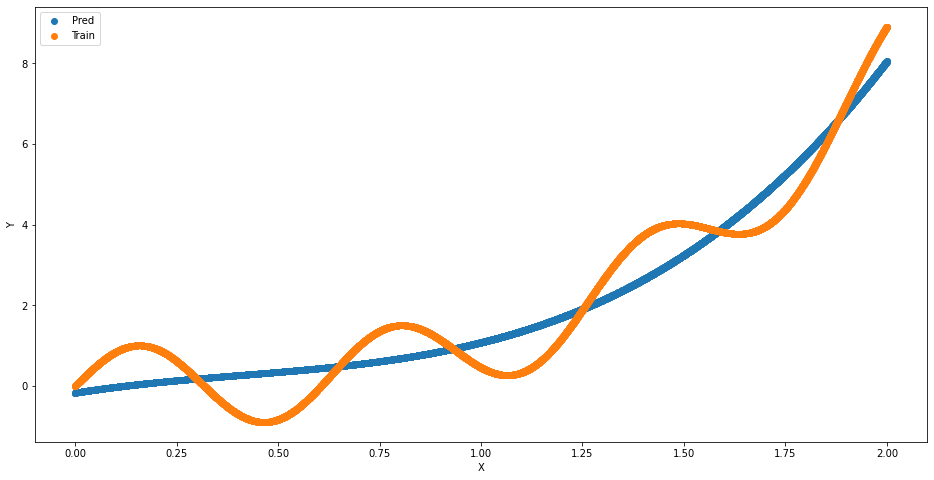

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(X_train,predTrain, label='Pred')
plt.scatter(X_train,Y_train, label='Train')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

### Si bien nuestro modelo sigue una forma similar a la data original, podemos decir que el modelo esta UNDERFITEADO ya que ni siquiera sobre el set de train podemos ver que fitee correctamente

# Punto 2
Utilizando el mismo dataset que en el link anterior, diseñar una red neuronal que haga un overfitting sobre el dataset. ¿Cómo saben que la red neuronal está haciendo overfitting? Agregar regularización y encontrar los parámetros correctos para lograr un buen fit. Explicar el procedimiento realizado.


In [ ]:
train_dataset_fulll = TensorDataset( Tensor(X_train), Tensor(Y_train) )
test_dataset_fulll = TensorDataset( Tensor(X_test), Tensor(Y_test) )


In [ ]:
dataloader = {
    'train': torch.utils.data.DataLoader(train_dataset_fulll, batch_size=50, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(test_dataset_fulll, batch_size=50, shuffle=False, pin_memory=True)
}

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset_fulll, batch_size=50, shuffle=True, pin_memory=True)
test_loader =  torch.utils.data.DataLoader(test_dataset_fulll, batch_size=50, shuffle=False, pin_memory=True)


In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(50, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 50)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x





In [ ]:
net = Net()
print(net)
learning_rate=0.001

Net(
  (fc1): Linear(in_features=50, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=50, bias=True)
)


## NNet sin regularizaion

In [ ]:
#optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate,weight_decay=1e-5)
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate)
criterion=nn.MSELoss()

In [ ]:
def early_stopping(train_loss, validation_loss, min_delta, tolerance):

    counter = 0
    if (validation_loss - train_loss) > min_delta:
        counter +=1
        if counter >= tolerance:
          return True

In [ ]:
def fit(model, dataloader,criterion,optimizer, epochs=5):
    model.to(device)
    losses = []
    val_losses = []
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            #X = X.float()
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            ####
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                #X = X.float()
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
         # early stopping
        #if early_stopping(train_loss[-1], val_loss[-1], min_delta=10, tolerance = 20):
        #  print("We are at epoch:", epoch)
        #  break
        losses.append(np.mean(train_loss))
        val_losses.append(np.mean(val_loss))
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f}")
    return losses,val_losses

In [ ]:
losses,val_losses=fit(net, dataloader ,criterion , optimizer, epochs=150)

100%|██████████| 60/60 [00:00<00:00, 1500.83it/s]


Epoch 1/150 loss 5.95311 val_loss 5.33415


100%|██████████| 60/60 [00:00<00:00, 1355.52it/s]


Epoch 2/150 loss 5.27354 val_loss 5.24368


100%|██████████| 60/60 [00:00<00:00, 1380.12it/s]


Epoch 3/150 loss 5.16110 val_loss 5.20990


100%|██████████| 60/60 [00:00<00:00, 1452.65it/s]


Epoch 4/150 loss 5.12184 val_loss 5.09667


100%|██████████| 60/60 [00:00<00:00, 1582.34it/s]


Epoch 5/150 loss 4.96891 val_loss 4.96245


100%|██████████| 60/60 [00:00<00:00, 1479.25it/s]


Epoch 6/150 loss 4.85814 val_loss 4.82302


100%|██████████| 60/60 [00:00<00:00, 1138.33it/s]


Epoch 7/150 loss 4.77456 val_loss 4.80750


100%|██████████| 60/60 [00:00<00:00, 1471.21it/s]


Epoch 8/150 loss 4.61644 val_loss 4.61827


100%|██████████| 60/60 [00:00<00:00, 1422.68it/s]


Epoch 9/150 loss 4.55802 val_loss 4.53469


100%|██████████| 60/60 [00:00<00:00, 1567.84it/s]


Epoch 10/150 loss 4.40604 val_loss 4.43134


100%|██████████| 60/60 [00:00<00:00, 1300.78it/s]


Epoch 11/150 loss 4.31593 val_loss 4.26739


100%|██████████| 60/60 [00:00<00:00, 1385.91it/s]


Epoch 12/150 loss 4.16544 val_loss 4.22308


100%|██████████| 60/60 [00:00<00:00, 1551.30it/s]


Epoch 13/150 loss 4.06356 val_loss 4.12582


100%|██████████| 60/60 [00:00<00:00, 1492.71it/s]


Epoch 14/150 loss 4.00717 val_loss 4.05951


100%|██████████| 60/60 [00:00<00:00, 1499.20it/s]


Epoch 15/150 loss 3.92104 val_loss 3.90353


100%|██████████| 60/60 [00:00<00:00, 1393.67it/s]


Epoch 16/150 loss 3.79860 val_loss 3.79042


100%|██████████| 60/60 [00:00<00:00, 1442.66it/s]


Epoch 17/150 loss 3.72284 val_loss 3.67894


100%|██████████| 60/60 [00:00<00:00, 1610.83it/s]


Epoch 18/150 loss 3.70345 val_loss 3.64112


100%|██████████| 60/60 [00:00<00:00, 1455.49it/s]


Epoch 19/150 loss 3.53885 val_loss 3.63225


100%|██████████| 60/60 [00:00<00:00, 1553.93it/s]


Epoch 20/150 loss 3.53201 val_loss 3.46079


100%|██████████| 60/60 [00:00<00:00, 1618.58it/s]


Epoch 21/150 loss 3.49928 val_loss 3.50132


100%|██████████| 60/60 [00:00<00:00, 1470.65it/s]


Epoch 22/150 loss 3.38677 val_loss 3.46254


100%|██████████| 60/60 [00:00<00:00, 1446.43it/s]


Epoch 23/150 loss 3.35795 val_loss 3.30940


100%|██████████| 60/60 [00:00<00:00, 1544.62it/s]


Epoch 24/150 loss 3.33307 val_loss 3.30850


100%|██████████| 60/60 [00:00<00:00, 1449.44it/s]


Epoch 25/150 loss 3.35635 val_loss 3.28731


100%|██████████| 60/60 [00:00<00:00, 1497.73it/s]


Epoch 26/150 loss 3.19917 val_loss 3.23980


100%|██████████| 60/60 [00:00<00:00, 1391.29it/s]


Epoch 27/150 loss 3.25435 val_loss 3.14055


100%|██████████| 60/60 [00:00<00:00, 1559.31it/s]


Epoch 28/150 loss 3.07589 val_loss 3.17627


100%|██████████| 60/60 [00:00<00:00, 1234.50it/s]


Epoch 29/150 loss 3.13148 val_loss 3.08510


100%|██████████| 60/60 [00:00<00:00, 1493.51it/s]


Epoch 30/150 loss 3.10041 val_loss 3.06679


100%|██████████| 60/60 [00:00<00:00, 1333.00it/s]


Epoch 31/150 loss 3.03342 val_loss 3.08913


100%|██████████| 60/60 [00:00<00:00, 1428.72it/s]


Epoch 32/150 loss 2.94436 val_loss 2.96830


100%|██████████| 60/60 [00:00<00:00, 1332.58it/s]


Epoch 33/150 loss 2.91675 val_loss 2.93763


100%|██████████| 60/60 [00:00<00:00, 1430.04it/s]


Epoch 34/150 loss 2.92787 val_loss 2.87647


100%|██████████| 60/60 [00:00<00:00, 1594.61it/s]


Epoch 35/150 loss 2.92305 val_loss 2.86888


100%|██████████| 60/60 [00:00<00:00, 1654.17it/s]


Epoch 36/150 loss 2.78024 val_loss 3.03937


100%|██████████| 60/60 [00:00<00:00, 1436.54it/s]


Epoch 37/150 loss 2.86612 val_loss 2.87510


100%|██████████| 60/60 [00:00<00:00, 1432.85it/s]


Epoch 38/150 loss 2.80917 val_loss 2.85851


100%|██████████| 60/60 [00:00<00:00, 1437.47it/s]


Epoch 39/150 loss 2.79586 val_loss 2.78975


100%|██████████| 60/60 [00:00<00:00, 1282.84it/s]


Epoch 40/150 loss 2.68438 val_loss 2.76523


100%|██████████| 60/60 [00:00<00:00, 1391.28it/s]


Epoch 41/150 loss 2.68390 val_loss 2.81470


100%|██████████| 60/60 [00:00<00:00, 1365.79it/s]


Epoch 42/150 loss 2.72015 val_loss 2.78059


100%|██████████| 60/60 [00:00<00:00, 1512.05it/s]


Epoch 43/150 loss 2.66586 val_loss 2.77237


100%|██████████| 60/60 [00:00<00:00, 1406.13it/s]


Epoch 44/150 loss 2.67666 val_loss 2.64088


100%|██████████| 60/60 [00:00<00:00, 1475.05it/s]


Epoch 45/150 loss 2.65331 val_loss 2.73144


100%|██████████| 60/60 [00:00<00:00, 1528.43it/s]


Epoch 46/150 loss 2.58552 val_loss 2.68243


100%|██████████| 60/60 [00:00<00:00, 1459.68it/s]


Epoch 47/150 loss 2.62098 val_loss 2.68299


100%|██████████| 60/60 [00:00<00:00, 1463.28it/s]


Epoch 48/150 loss 2.59643 val_loss 2.66594


100%|██████████| 60/60 [00:00<00:00, 1390.91it/s]


Epoch 49/150 loss 2.68671 val_loss 2.52915


100%|██████████| 60/60 [00:00<00:00, 1409.67it/s]


Epoch 50/150 loss 2.58268 val_loss 2.58471


100%|██████████| 60/60 [00:00<00:00, 1499.58it/s]


Epoch 51/150 loss 2.57947 val_loss 2.55386


100%|██████████| 60/60 [00:00<00:00, 1461.12it/s]


Epoch 52/150 loss 2.51377 val_loss 2.60827


100%|██████████| 60/60 [00:00<00:00, 1488.01it/s]


Epoch 53/150 loss 2.55456 val_loss 2.47080


100%|██████████| 60/60 [00:00<00:00, 1297.90it/s]


Epoch 54/150 loss 2.47682 val_loss 2.45065


100%|██████████| 60/60 [00:00<00:00, 1342.16it/s]


Epoch 55/150 loss 2.40035 val_loss 2.41697


100%|██████████| 60/60 [00:00<00:00, 1467.39it/s]


Epoch 56/150 loss 2.40653 val_loss 2.52381


100%|██████████| 60/60 [00:00<00:00, 1347.86it/s]


Epoch 57/150 loss 2.46018 val_loss 2.45241


100%|██████████| 60/60 [00:00<00:00, 1435.08it/s]


Epoch 58/150 loss 2.39071 val_loss 2.42767


100%|██████████| 60/60 [00:00<00:00, 1503.79it/s]


Epoch 59/150 loss 2.46415 val_loss 2.49562


100%|██████████| 60/60 [00:00<00:00, 1333.44it/s]


Epoch 60/150 loss 2.40841 val_loss 2.45598


100%|██████████| 60/60 [00:00<00:00, 1556.48it/s]


Epoch 61/150 loss 2.40825 val_loss 2.38732


100%|██████████| 60/60 [00:00<00:00, 1444.96it/s]


Epoch 62/150 loss 2.38229 val_loss 2.40720


100%|██████████| 60/60 [00:00<00:00, 1480.24it/s]


Epoch 63/150 loss 2.41332 val_loss 2.41846


100%|██████████| 60/60 [00:00<00:00, 1396.20it/s]


Epoch 64/150 loss 2.36910 val_loss 2.50955


100%|██████████| 60/60 [00:00<00:00, 1486.62it/s]


Epoch 65/150 loss 2.40075 val_loss 2.38516


100%|██████████| 60/60 [00:00<00:00, 1304.89it/s]


Epoch 66/150 loss 2.41419 val_loss 2.46774


100%|██████████| 60/60 [00:00<00:00, 1390.69it/s]


Epoch 67/150 loss 2.35688 val_loss 2.35441


100%|██████████| 60/60 [00:00<00:00, 1468.42it/s]


Epoch 68/150 loss 2.34595 val_loss 2.34369


100%|██████████| 60/60 [00:00<00:00, 1461.20it/s]


Epoch 69/150 loss 2.31886 val_loss 2.37059


100%|██████████| 60/60 [00:00<00:00, 1446.69it/s]


Epoch 70/150 loss 2.27385 val_loss 2.41972


100%|██████████| 60/60 [00:00<00:00, 1354.41it/s]


Epoch 71/150 loss 2.31897 val_loss 2.23838


100%|██████████| 60/60 [00:00<00:00, 1363.05it/s]


Epoch 72/150 loss 2.33884 val_loss 2.46225


100%|██████████| 60/60 [00:00<00:00, 1278.58it/s]


Epoch 73/150 loss 2.32168 val_loss 2.30650


100%|██████████| 60/60 [00:00<00:00, 1308.00it/s]


Epoch 74/150 loss 2.29898 val_loss 2.41093


100%|██████████| 60/60 [00:00<00:00, 1361.56it/s]


Epoch 75/150 loss 2.30393 val_loss 2.39139


100%|██████████| 60/60 [00:00<00:00, 1372.00it/s]


Epoch 76/150 loss 2.25118 val_loss 2.26493


100%|██████████| 60/60 [00:00<00:00, 1385.45it/s]


Epoch 77/150 loss 2.23101 val_loss 2.26864


100%|██████████| 60/60 [00:00<00:00, 1371.13it/s]


Epoch 78/150 loss 2.29921 val_loss 2.41527


100%|██████████| 60/60 [00:00<00:00, 1313.14it/s]


Epoch 79/150 loss 2.29717 val_loss 2.30571


100%|██████████| 60/60 [00:00<00:00, 1471.92it/s]


Epoch 80/150 loss 2.25735 val_loss 2.32140


100%|██████████| 60/60 [00:00<00:00, 1517.24it/s]


Epoch 81/150 loss 2.26714 val_loss 2.29434


100%|██████████| 60/60 [00:00<00:00, 1528.96it/s]


Epoch 82/150 loss 2.22352 val_loss 2.33094


100%|██████████| 60/60 [00:00<00:00, 1374.37it/s]


Epoch 83/150 loss 2.23782 val_loss 2.27722


100%|██████████| 60/60 [00:00<00:00, 1490.67it/s]


Epoch 84/150 loss 2.24963 val_loss 2.23212


100%|██████████| 60/60 [00:00<00:00, 1570.76it/s]


Epoch 85/150 loss 2.25230 val_loss 2.28413


100%|██████████| 60/60 [00:00<00:00, 1302.34it/s]


Epoch 86/150 loss 2.27017 val_loss 2.28803


100%|██████████| 60/60 [00:00<00:00, 1432.42it/s]


Epoch 87/150 loss 2.24539 val_loss 2.19034


100%|██████████| 60/60 [00:00<00:00, 1461.80it/s]


Epoch 88/150 loss 2.24282 val_loss 2.23553


100%|██████████| 60/60 [00:00<00:00, 1211.08it/s]


Epoch 89/150 loss 2.27126 val_loss 2.22060


100%|██████████| 60/60 [00:00<00:00, 1585.59it/s]


Epoch 90/150 loss 2.25242 val_loss 2.24162


100%|██████████| 60/60 [00:00<00:00, 1407.13it/s]


Epoch 91/150 loss 2.26974 val_loss 2.30634


100%|██████████| 60/60 [00:00<00:00, 1148.36it/s]


Epoch 92/150 loss 2.22868 val_loss 2.25397


100%|██████████| 60/60 [00:00<00:00, 1409.82it/s]


Epoch 93/150 loss 2.21709 val_loss 2.21479


100%|██████████| 60/60 [00:00<00:00, 1484.53it/s]


Epoch 94/150 loss 2.26990 val_loss 2.20987


100%|██████████| 60/60 [00:00<00:00, 1500.87it/s]


Epoch 95/150 loss 2.26405 val_loss 2.28073


100%|██████████| 60/60 [00:00<00:00, 1240.34it/s]


Epoch 96/150 loss 2.17509 val_loss 2.23554


100%|██████████| 60/60 [00:00<00:00, 1462.42it/s]


Epoch 97/150 loss 2.24857 val_loss 2.22926


100%|██████████| 60/60 [00:00<00:00, 1395.55it/s]


Epoch 98/150 loss 2.22008 val_loss 2.27849


100%|██████████| 60/60 [00:00<00:00, 1452.13it/s]


Epoch 99/150 loss 2.24119 val_loss 2.19530


100%|██████████| 60/60 [00:00<00:00, 1507.23it/s]


Epoch 100/150 loss 2.19206 val_loss 2.27117


100%|██████████| 60/60 [00:00<00:00, 1480.76it/s]


Epoch 101/150 loss 2.21930 val_loss 2.15029


100%|██████████| 60/60 [00:00<00:00, 1277.82it/s]


Epoch 102/150 loss 2.20751 val_loss 2.23440


100%|██████████| 60/60 [00:00<00:00, 1497.12it/s]


Epoch 103/150 loss 2.21333 val_loss 2.20638


100%|██████████| 60/60 [00:00<00:00, 1439.76it/s]


Epoch 104/150 loss 2.20678 val_loss 2.17360


100%|██████████| 60/60 [00:00<00:00, 1441.66it/s]


Epoch 105/150 loss 2.21802 val_loss 2.20946


100%|██████████| 60/60 [00:00<00:00, 1274.35it/s]


Epoch 106/150 loss 2.21680 val_loss 2.18160


100%|██████████| 60/60 [00:00<00:00, 1431.96it/s]


Epoch 107/150 loss 2.28613 val_loss 2.16146


100%|██████████| 60/60 [00:00<00:00, 1310.67it/s]


Epoch 108/150 loss 2.17900 val_loss 2.23090


100%|██████████| 60/60 [00:00<00:00, 1322.05it/s]


Epoch 109/150 loss 2.18011 val_loss 2.13880


100%|██████████| 60/60 [00:00<00:00, 1354.39it/s]


Epoch 110/150 loss 2.25046 val_loss 2.22095


100%|██████████| 60/60 [00:00<00:00, 1325.51it/s]


Epoch 111/150 loss 2.22295 val_loss 2.26228


100%|██████████| 60/60 [00:00<00:00, 1375.58it/s]


Epoch 112/150 loss 2.19957 val_loss 2.13429


100%|██████████| 60/60 [00:00<00:00, 838.18it/s]


Epoch 113/150 loss 2.26892 val_loss 2.08118


100%|██████████| 60/60 [00:00<00:00, 908.74it/s]


Epoch 114/150 loss 2.21447 val_loss 2.16756


100%|██████████| 60/60 [00:00<00:00, 950.30it/s]


Epoch 115/150 loss 2.17413 val_loss 2.16905


100%|██████████| 60/60 [00:00<00:00, 916.41it/s]


Epoch 116/150 loss 2.17621 val_loss 2.13552


100%|██████████| 60/60 [00:00<00:00, 1046.70it/s]


Epoch 117/150 loss 2.18234 val_loss 2.17021


100%|██████████| 60/60 [00:00<00:00, 1046.00it/s]


Epoch 118/150 loss 2.20954 val_loss 2.12418


100%|██████████| 60/60 [00:00<00:00, 891.59it/s]


Epoch 119/150 loss 2.19708 val_loss 2.19030


100%|██████████| 60/60 [00:00<00:00, 1288.61it/s]


Epoch 120/150 loss 2.19136 val_loss 2.14971


100%|██████████| 60/60 [00:00<00:00, 1445.22it/s]


Epoch 121/150 loss 2.15609 val_loss 2.16483


100%|██████████| 60/60 [00:00<00:00, 1504.81it/s]


Epoch 122/150 loss 2.15326 val_loss 2.21495


100%|██████████| 60/60 [00:00<00:00, 1474.19it/s]


Epoch 123/150 loss 2.18637 val_loss 2.13464


100%|██████████| 60/60 [00:00<00:00, 1453.64it/s]


Epoch 124/150 loss 2.17695 val_loss 2.09984


100%|██████████| 60/60 [00:00<00:00, 1319.18it/s]


Epoch 125/150 loss 2.18770 val_loss 2.06982


100%|██████████| 60/60 [00:00<00:00, 1337.85it/s]


Epoch 126/150 loss 2.11198 val_loss 2.15395


100%|██████████| 60/60 [00:00<00:00, 1366.65it/s]


Epoch 127/150 loss 2.14576 val_loss 2.08235


100%|██████████| 60/60 [00:00<00:00, 1413.24it/s]


Epoch 128/150 loss 2.12361 val_loss 2.07148


100%|██████████| 60/60 [00:00<00:00, 1434.53it/s]


Epoch 129/150 loss 2.11154 val_loss 2.14118


100%|██████████| 60/60 [00:00<00:00, 1194.38it/s]


Epoch 130/150 loss 2.13048 val_loss 2.01007


100%|██████████| 60/60 [00:00<00:00, 1470.83it/s]


Epoch 131/150 loss 2.16209 val_loss 2.12615


100%|██████████| 60/60 [00:00<00:00, 1262.70it/s]


Epoch 132/150 loss 2.14869 val_loss 2.11016


100%|██████████| 60/60 [00:00<00:00, 1185.37it/s]


Epoch 133/150 loss 2.09124 val_loss 2.03061


100%|██████████| 60/60 [00:00<00:00, 1349.40it/s]


Epoch 134/150 loss 2.13266 val_loss 2.09578


100%|██████████| 60/60 [00:00<00:00, 1422.40it/s]


Epoch 135/150 loss 2.11174 val_loss 2.20789


100%|██████████| 60/60 [00:00<00:00, 1441.37it/s]


Epoch 136/150 loss 2.15777 val_loss 2.20529


100%|██████████| 60/60 [00:00<00:00, 1436.73it/s]


Epoch 137/150 loss 2.08961 val_loss 2.13645


100%|██████████| 60/60 [00:00<00:00, 1360.68it/s]


Epoch 138/150 loss 2.10059 val_loss 2.13644


100%|██████████| 60/60 [00:00<00:00, 1300.11it/s]


Epoch 139/150 loss 2.08044 val_loss 2.18381


100%|██████████| 60/60 [00:00<00:00, 1394.59it/s]


Epoch 140/150 loss 2.11045 val_loss 2.11037


100%|██████████| 60/60 [00:00<00:00, 1366.22it/s]


Epoch 141/150 loss 2.14460 val_loss 2.03731


100%|██████████| 60/60 [00:00<00:00, 1420.39it/s]


Epoch 142/150 loss 2.04123 val_loss 2.04539


100%|██████████| 60/60 [00:00<00:00, 1264.72it/s]


Epoch 143/150 loss 2.09163 val_loss 2.09682


100%|██████████| 60/60 [00:00<00:00, 1426.54it/s]


Epoch 144/150 loss 2.11304 val_loss 2.03663


100%|██████████| 60/60 [00:00<00:00, 1412.40it/s]


Epoch 145/150 loss 2.05712 val_loss 2.05040


100%|██████████| 60/60 [00:00<00:00, 1481.01it/s]


Epoch 146/150 loss 2.05445 val_loss 2.03175


100%|██████████| 60/60 [00:00<00:00, 1481.90it/s]


Epoch 147/150 loss 2.06017 val_loss 2.14484


100%|██████████| 60/60 [00:00<00:00, 1313.93it/s]


Epoch 148/150 loss 2.08922 val_loss 2.19523


100%|██████████| 60/60 [00:00<00:00, 1419.38it/s]


Epoch 149/150 loss 2.06245 val_loss 2.07017


100%|██████████| 60/60 [00:00<00:00, 1449.44it/s]

Epoch 150/150 loss 2.16098 val_loss 2.10515


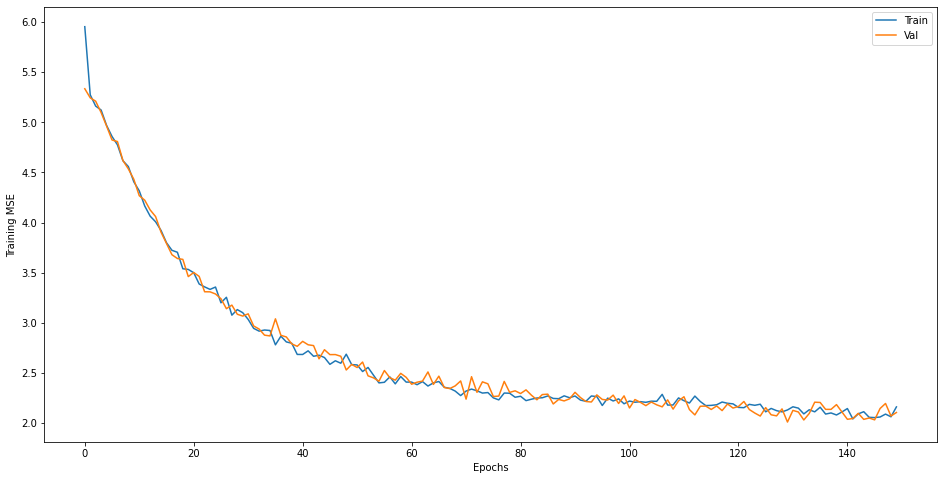

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(losses, label='Train')
plt.plot(val_losses, label='Val')
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.legend()
plt.show()

Como la funcion es relativamente simple, le alcanza con los datos de training para capturar al maximo la funcion, como podemos ver en el grafico no notamos que la validation loss suba por lo tanto no podemos conseguir un overfitting

## Nnet con regularizacion

In [ ]:
net = Net()
print(net)
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate,weight_decay=1e-5)
criterion=nn.MSELoss()


Net(
  (fc1): Linear(in_features=50, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=50, bias=True)
)


In [ ]:
losses,val_losses=fit(net, dataloader,criterion,optimizer, epochs=150)

100%|██████████| 60/60 [00:00<00:00, 1228.65it/s]


Epoch 1/150 loss 5.92109 val_loss 5.36572


100%|██████████| 60/60 [00:00<00:00, 1426.08it/s]


Epoch 2/150 loss 5.27211 val_loss 5.30820


100%|██████████| 60/60 [00:00<00:00, 1545.81it/s]


Epoch 3/150 loss 5.19648 val_loss 5.31251


100%|██████████| 60/60 [00:00<00:00, 1382.04it/s]


Epoch 4/150 loss 5.12881 val_loss 5.08041


100%|██████████| 60/60 [00:00<00:00, 1465.11it/s]


Epoch 5/150 loss 5.04147 val_loss 5.05760


100%|██████████| 60/60 [00:00<00:00, 1461.80it/s]


Epoch 6/150 loss 4.95973 val_loss 4.92329


100%|██████████| 60/60 [00:00<00:00, 1221.90it/s]


Epoch 7/150 loss 4.78756 val_loss 4.75167


100%|██████████| 60/60 [00:00<00:00, 1338.91it/s]


Epoch 8/150 loss 4.71727 val_loss 4.60214


100%|██████████| 60/60 [00:00<00:00, 1420.05it/s]


Epoch 9/150 loss 4.58813 val_loss 4.60442


100%|██████████| 60/60 [00:00<00:00, 1364.52it/s]


Epoch 10/150 loss 4.52627 val_loss 4.32888


100%|██████████| 60/60 [00:00<00:00, 1368.12it/s]


Epoch 11/150 loss 4.36441 val_loss 4.32437


100%|██████████| 60/60 [00:00<00:00, 1514.67it/s]


Epoch 12/150 loss 4.25900 val_loss 4.22367


100%|██████████| 60/60 [00:00<00:00, 1430.45it/s]


Epoch 13/150 loss 4.23102 val_loss 4.10289


100%|██████████| 60/60 [00:00<00:00, 1385.23it/s]


Epoch 14/150 loss 4.09784 val_loss 4.05698


100%|██████████| 60/60 [00:00<00:00, 1343.67it/s]


Epoch 15/150 loss 4.04491 val_loss 3.94601


100%|██████████| 60/60 [00:00<00:00, 1434.55it/s]


Epoch 16/150 loss 3.94968 val_loss 3.86822


100%|██████████| 60/60 [00:00<00:00, 1397.16it/s]


Epoch 17/150 loss 3.90807 val_loss 3.79733


100%|██████████| 60/60 [00:00<00:00, 1410.77it/s]


Epoch 18/150 loss 3.79561 val_loss 3.74300


100%|██████████| 60/60 [00:00<00:00, 1523.70it/s]


Epoch 19/150 loss 3.73804 val_loss 3.67282


100%|██████████| 60/60 [00:00<00:00, 1467.47it/s]


Epoch 20/150 loss 3.64287 val_loss 3.55870


100%|██████████| 60/60 [00:00<00:00, 1453.62it/s]


Epoch 21/150 loss 3.65763 val_loss 3.52199


100%|██████████| 60/60 [00:00<00:00, 1219.74it/s]


Epoch 22/150 loss 3.55671 val_loss 3.50781


100%|██████████| 60/60 [00:00<00:00, 1476.74it/s]


Epoch 23/150 loss 3.55215 val_loss 3.38615


100%|██████████| 60/60 [00:00<00:00, 1380.89it/s]


Epoch 24/150 loss 3.50133 val_loss 3.37194


100%|██████████| 60/60 [00:00<00:00, 1169.44it/s]


Epoch 25/150 loss 3.42786 val_loss 3.40198


100%|██████████| 60/60 [00:00<00:00, 1455.97it/s]


Epoch 26/150 loss 3.34027 val_loss 3.32369


100%|██████████| 60/60 [00:00<00:00, 1378.94it/s]


Epoch 27/150 loss 3.28012 val_loss 3.26877


100%|██████████| 60/60 [00:00<00:00, 1531.08it/s]


Epoch 28/150 loss 3.23956 val_loss 3.17942


100%|██████████| 60/60 [00:00<00:00, 1464.89it/s]


Epoch 29/150 loss 3.23241 val_loss 3.17860


100%|██████████| 60/60 [00:00<00:00, 1568.94it/s]


Epoch 30/150 loss 3.18923 val_loss 3.13488


100%|██████████| 60/60 [00:00<00:00, 1524.22it/s]


Epoch 31/150 loss 3.21178 val_loss 3.09067


100%|██████████| 60/60 [00:00<00:00, 1463.81it/s]


Epoch 32/150 loss 3.14612 val_loss 3.07807


100%|██████████| 60/60 [00:00<00:00, 1400.03it/s]


Epoch 33/150 loss 3.11361 val_loss 3.02285


100%|██████████| 60/60 [00:00<00:00, 1473.76it/s]


Epoch 34/150 loss 3.07018 val_loss 2.95207


100%|██████████| 60/60 [00:00<00:00, 1535.25it/s]


Epoch 35/150 loss 3.00013 val_loss 2.89268


100%|██████████| 60/60 [00:00<00:00, 1557.86it/s]


Epoch 36/150 loss 2.95270 val_loss 2.95431


100%|██████████| 60/60 [00:00<00:00, 1480.74it/s]


Epoch 37/150 loss 2.93506 val_loss 2.89808


100%|██████████| 60/60 [00:00<00:00, 1505.78it/s]


Epoch 38/150 loss 2.90067 val_loss 2.89191


100%|██████████| 60/60 [00:00<00:00, 1491.66it/s]


Epoch 39/150 loss 2.91273 val_loss 2.89463


100%|██████████| 60/60 [00:00<00:00, 1515.93it/s]


Epoch 40/150 loss 2.85971 val_loss 2.82629


100%|██████████| 60/60 [00:00<00:00, 1432.02it/s]


Epoch 41/150 loss 2.82783 val_loss 2.78654


100%|██████████| 60/60 [00:00<00:00, 1175.98it/s]


Epoch 42/150 loss 2.90967 val_loss 2.77023


100%|██████████| 60/60 [00:00<00:00, 1499.08it/s]


Epoch 43/150 loss 2.87956 val_loss 2.67838


100%|██████████| 60/60 [00:00<00:00, 1557.22it/s]


Epoch 44/150 loss 2.83725 val_loss 2.75421


100%|██████████| 60/60 [00:00<00:00, 1260.44it/s]


Epoch 45/150 loss 2.84984 val_loss 2.76094


100%|██████████| 60/60 [00:00<00:00, 1477.54it/s]


Epoch 46/150 loss 2.79535 val_loss 2.71559


100%|██████████| 60/60 [00:00<00:00, 1441.73it/s]


Epoch 47/150 loss 2.78782 val_loss 2.69475


100%|██████████| 60/60 [00:00<00:00, 1569.16it/s]


Epoch 48/150 loss 2.75208 val_loss 2.69534


100%|██████████| 60/60 [00:00<00:00, 1498.79it/s]


Epoch 49/150 loss 2.77063 val_loss 2.71127


100%|██████████| 60/60 [00:00<00:00, 1433.35it/s]


Epoch 50/150 loss 2.77523 val_loss 2.66221


100%|██████████| 60/60 [00:00<00:00, 1294.41it/s]


Epoch 51/150 loss 2.76429 val_loss 2.72048


100%|██████████| 60/60 [00:00<00:00, 1465.27it/s]


Epoch 52/150 loss 2.71656 val_loss 2.63240


100%|██████████| 60/60 [00:00<00:00, 1469.31it/s]


Epoch 53/150 loss 2.66769 val_loss 2.72149


100%|██████████| 60/60 [00:00<00:00, 1505.46it/s]


Epoch 54/150 loss 2.67890 val_loss 2.69245


100%|██████████| 60/60 [00:00<00:00, 1399.73it/s]


Epoch 55/150 loss 2.72930 val_loss 2.59593


100%|██████████| 60/60 [00:00<00:00, 1439.94it/s]


Epoch 56/150 loss 2.63357 val_loss 2.56328


100%|██████████| 60/60 [00:00<00:00, 1541.51it/s]


Epoch 57/150 loss 2.66618 val_loss 2.52811


100%|██████████| 60/60 [00:00<00:00, 1479.46it/s]


Epoch 58/150 loss 2.64357 val_loss 2.66714


100%|██████████| 60/60 [00:00<00:00, 1434.66it/s]


Epoch 59/150 loss 2.63472 val_loss 2.54004


100%|██████████| 60/60 [00:00<00:00, 1423.12it/s]


Epoch 60/150 loss 2.59322 val_loss 2.54826


100%|██████████| 60/60 [00:00<00:00, 1402.02it/s]


Epoch 61/150 loss 2.57518 val_loss 2.56316


100%|██████████| 60/60 [00:00<00:00, 1431.02it/s]


Epoch 62/150 loss 2.55447 val_loss 2.54378


100%|██████████| 60/60 [00:00<00:00, 1590.47it/s]


Epoch 63/150 loss 2.64935 val_loss 2.57575


100%|██████████| 60/60 [00:00<00:00, 1358.27it/s]


Epoch 64/150 loss 2.67753 val_loss 2.50845


100%|██████████| 60/60 [00:00<00:00, 1387.51it/s]


Epoch 65/150 loss 2.64047 val_loss 2.51790


100%|██████████| 60/60 [00:00<00:00, 1286.10it/s]


Epoch 66/150 loss 2.56664 val_loss 2.51377


100%|██████████| 60/60 [00:00<00:00, 1339.02it/s]


Epoch 67/150 loss 2.60816 val_loss 2.47978


100%|██████████| 60/60 [00:00<00:00, 1329.29it/s]


Epoch 68/150 loss 2.55538 val_loss 2.59418


100%|██████████| 60/60 [00:00<00:00, 1589.70it/s]


Epoch 69/150 loss 2.57766 val_loss 2.51106


100%|██████████| 60/60 [00:00<00:00, 1443.53it/s]


Epoch 70/150 loss 2.54459 val_loss 2.57647


100%|██████████| 60/60 [00:00<00:00, 1499.08it/s]


Epoch 71/150 loss 2.55464 val_loss 2.47759


100%|██████████| 60/60 [00:00<00:00, 1407.74it/s]


Epoch 72/150 loss 2.57653 val_loss 2.50496


100%|██████████| 60/60 [00:00<00:00, 1399.41it/s]


Epoch 73/150 loss 2.55904 val_loss 2.55045


100%|██████████| 60/60 [00:00<00:00, 1501.50it/s]


Epoch 74/150 loss 2.56362 val_loss 2.55589


100%|██████████| 60/60 [00:00<00:00, 1534.76it/s]


Epoch 75/150 loss 2.49908 val_loss 2.49705


100%|██████████| 60/60 [00:00<00:00, 1339.48it/s]


Epoch 76/150 loss 2.57910 val_loss 2.55297


100%|██████████| 60/60 [00:00<00:00, 1406.52it/s]


Epoch 77/150 loss 2.51427 val_loss 2.53836


100%|██████████| 60/60 [00:00<00:00, 1427.89it/s]


Epoch 78/150 loss 2.53215 val_loss 2.42173


100%|██████████| 60/60 [00:00<00:00, 1486.55it/s]


Epoch 79/150 loss 2.41515 val_loss 2.43385


100%|██████████| 60/60 [00:00<00:00, 1442.51it/s]


Epoch 80/150 loss 2.48992 val_loss 2.42621


100%|██████████| 60/60 [00:00<00:00, 1623.27it/s]


Epoch 81/150 loss 2.50114 val_loss 2.43104


100%|██████████| 60/60 [00:00<00:00, 1155.58it/s]


Epoch 82/150 loss 2.53030 val_loss 2.49892


100%|██████████| 60/60 [00:00<00:00, 1462.75it/s]


Epoch 83/150 loss 2.46449 val_loss 2.46174


100%|██████████| 60/60 [00:00<00:00, 1547.50it/s]


Epoch 84/150 loss 2.51735 val_loss 2.39109


100%|██████████| 60/60 [00:00<00:00, 1241.63it/s]


Epoch 85/150 loss 2.49159 val_loss 2.54274


100%|██████████| 60/60 [00:00<00:00, 1478.80it/s]


Epoch 86/150 loss 2.39317 val_loss 2.44279


100%|██████████| 60/60 [00:00<00:00, 1427.26it/s]


Epoch 87/150 loss 2.51298 val_loss 2.39824


100%|██████████| 60/60 [00:00<00:00, 1427.93it/s]


Epoch 88/150 loss 2.45657 val_loss 2.49352


100%|██████████| 60/60 [00:00<00:00, 1433.35it/s]


Epoch 89/150 loss 2.47053 val_loss 2.41305


100%|██████████| 60/60 [00:00<00:00, 1665.50it/s]


Epoch 90/150 loss 2.50142 val_loss 2.40175


100%|██████████| 60/60 [00:00<00:00, 1372.67it/s]


Epoch 91/150 loss 2.43609 val_loss 2.45945


100%|██████████| 60/60 [00:00<00:00, 1354.87it/s]


Epoch 92/150 loss 2.39861 val_loss 2.41741


100%|██████████| 60/60 [00:00<00:00, 1317.01it/s]


Epoch 93/150 loss 2.37875 val_loss 2.45289


100%|██████████| 60/60 [00:00<00:00, 1545.30it/s]


Epoch 94/150 loss 2.45775 val_loss 2.43901


100%|██████████| 60/60 [00:00<00:00, 1554.18it/s]


Epoch 95/150 loss 2.39564 val_loss 2.36608


100%|██████████| 60/60 [00:00<00:00, 1241.33it/s]


Epoch 96/150 loss 2.41473 val_loss 2.43842


100%|██████████| 60/60 [00:00<00:00, 1461.31it/s]


Epoch 97/150 loss 2.43641 val_loss 2.41287


100%|██████████| 60/60 [00:00<00:00, 1406.69it/s]


Epoch 98/150 loss 2.41552 val_loss 2.36563


100%|██████████| 60/60 [00:00<00:00, 1501.96it/s]


Epoch 99/150 loss 2.41744 val_loss 2.43763


100%|██████████| 60/60 [00:00<00:00, 1257.28it/s]


Epoch 100/150 loss 2.40477 val_loss 2.40734


100%|██████████| 60/60 [00:00<00:00, 1275.47it/s]


Epoch 101/150 loss 2.33486 val_loss 2.42220


100%|██████████| 60/60 [00:00<00:00, 1379.31it/s]


Epoch 102/150 loss 2.39111 val_loss 2.32113


100%|██████████| 60/60 [00:00<00:00, 1577.63it/s]


Epoch 103/150 loss 2.39473 val_loss 2.36739


100%|██████████| 60/60 [00:00<00:00, 1493.98it/s]


Epoch 104/150 loss 2.38890 val_loss 2.35348


100%|██████████| 60/60 [00:00<00:00, 1522.71it/s]


Epoch 105/150 loss 2.37038 val_loss 2.38928


100%|██████████| 60/60 [00:00<00:00, 1471.22it/s]


Epoch 106/150 loss 2.37203 val_loss 2.37374


100%|██████████| 60/60 [00:00<00:00, 1392.42it/s]


Epoch 107/150 loss 2.39790 val_loss 2.35540


100%|██████████| 60/60 [00:00<00:00, 1483.66it/s]


Epoch 108/150 loss 2.33703 val_loss 2.43528


100%|██████████| 60/60 [00:00<00:00, 1450.64it/s]


Epoch 109/150 loss 2.35871 val_loss 2.35524


100%|██████████| 60/60 [00:00<00:00, 1554.04it/s]


Epoch 110/150 loss 2.35104 val_loss 2.29035


100%|██████████| 60/60 [00:00<00:00, 1348.73it/s]


Epoch 111/150 loss 2.35616 val_loss 2.28735


100%|██████████| 60/60 [00:00<00:00, 1474.06it/s]


Epoch 112/150 loss 2.34657 val_loss 2.36527


100%|██████████| 60/60 [00:00<00:00, 1233.30it/s]


Epoch 113/150 loss 2.32543 val_loss 2.43391


100%|██████████| 60/60 [00:00<00:00, 1336.52it/s]


Epoch 114/150 loss 2.34662 val_loss 2.42873


100%|██████████| 60/60 [00:00<00:00, 1360.59it/s]


Epoch 115/150 loss 2.36527 val_loss 2.40940


100%|██████████| 60/60 [00:00<00:00, 1429.75it/s]


Epoch 116/150 loss 2.42703 val_loss 2.38843


100%|██████████| 60/60 [00:00<00:00, 1296.64it/s]


Epoch 117/150 loss 2.36734 val_loss 2.30222


100%|██████████| 60/60 [00:00<00:00, 1238.51it/s]


Epoch 118/150 loss 2.40636 val_loss 2.37989


100%|██████████| 60/60 [00:00<00:00, 1180.35it/s]


Epoch 119/150 loss 2.37237 val_loss 2.32730


100%|██████████| 60/60 [00:00<00:00, 1501.17it/s]


Epoch 120/150 loss 2.36027 val_loss 2.36583


100%|██████████| 60/60 [00:00<00:00, 1589.05it/s]


Epoch 121/150 loss 2.34849 val_loss 2.34649


100%|██████████| 60/60 [00:00<00:00, 1384.21it/s]


Epoch 122/150 loss 2.31829 val_loss 2.47885


100%|██████████| 60/60 [00:00<00:00, 1249.68it/s]


Epoch 123/150 loss 2.41417 val_loss 2.40507


100%|██████████| 60/60 [00:00<00:00, 1437.32it/s]


Epoch 124/150 loss 2.33776 val_loss 2.28875


100%|██████████| 60/60 [00:00<00:00, 1185.13it/s]


Epoch 125/150 loss 2.40240 val_loss 2.35650


100%|██████████| 60/60 [00:00<00:00, 1358.47it/s]


Epoch 126/150 loss 2.30718 val_loss 2.32155


100%|██████████| 60/60 [00:00<00:00, 1311.38it/s]


Epoch 127/150 loss 2.41978 val_loss 2.37586


100%|██████████| 60/60 [00:00<00:00, 1305.97it/s]


Epoch 128/150 loss 2.34068 val_loss 2.31780


100%|██████████| 60/60 [00:00<00:00, 1407.15it/s]


Epoch 129/150 loss 2.37811 val_loss 2.40983


100%|██████████| 60/60 [00:00<00:00, 1175.90it/s]


Epoch 130/150 loss 2.36033 val_loss 2.33905


100%|██████████| 60/60 [00:00<00:00, 1452.06it/s]


Epoch 131/150 loss 2.29541 val_loss 2.39598


100%|██████████| 60/60 [00:00<00:00, 1516.44it/s]


Epoch 132/150 loss 2.32963 val_loss 2.33513


100%|██████████| 60/60 [00:00<00:00, 1219.53it/s]


Epoch 133/150 loss 2.34852 val_loss 2.48617


100%|██████████| 60/60 [00:00<00:00, 1352.99it/s]


Epoch 134/150 loss 2.34256 val_loss 2.39087


100%|██████████| 60/60 [00:00<00:00, 1437.61it/s]


Epoch 135/150 loss 2.39607 val_loss 2.33861


100%|██████████| 60/60 [00:00<00:00, 1483.37it/s]


Epoch 136/150 loss 2.31709 val_loss 2.32964


100%|██████████| 60/60 [00:00<00:00, 1492.55it/s]


Epoch 137/150 loss 2.36682 val_loss 2.30239


100%|██████████| 60/60 [00:00<00:00, 1407.22it/s]


Epoch 138/150 loss 2.40155 val_loss 2.36526


100%|██████████| 60/60 [00:00<00:00, 1478.03it/s]


Epoch 139/150 loss 2.34526 val_loss 2.41213


100%|██████████| 60/60 [00:00<00:00, 1540.45it/s]


Epoch 140/150 loss 2.41152 val_loss 2.31939


100%|██████████| 60/60 [00:00<00:00, 1498.35it/s]


Epoch 141/150 loss 2.32194 val_loss 2.32476


100%|██████████| 60/60 [00:00<00:00, 1493.41it/s]


Epoch 142/150 loss 2.39781 val_loss 2.29244


100%|██████████| 60/60 [00:00<00:00, 1447.58it/s]


Epoch 143/150 loss 2.37888 val_loss 2.34999


100%|██████████| 60/60 [00:00<00:00, 1084.74it/s]


Epoch 144/150 loss 2.38724 val_loss 2.31358


100%|██████████| 60/60 [00:00<00:00, 1533.03it/s]


Epoch 145/150 loss 2.39092 val_loss 2.36757


100%|██████████| 60/60 [00:00<00:00, 1551.30it/s]


Epoch 146/150 loss 2.42277 val_loss 2.42193


100%|██████████| 60/60 [00:00<00:00, 1471.22it/s]


Epoch 147/150 loss 2.36762 val_loss 2.39566


100%|██████████| 60/60 [00:00<00:00, 1471.03it/s]


Epoch 148/150 loss 2.30337 val_loss 2.32943


100%|██████████| 60/60 [00:00<00:00, 1348.02it/s]


Epoch 149/150 loss 2.38414 val_loss 2.35168


100%|██████████| 60/60 [00:00<00:00, 1455.57it/s]

Epoch 150/150 loss 2.33650 val_loss 2.40021


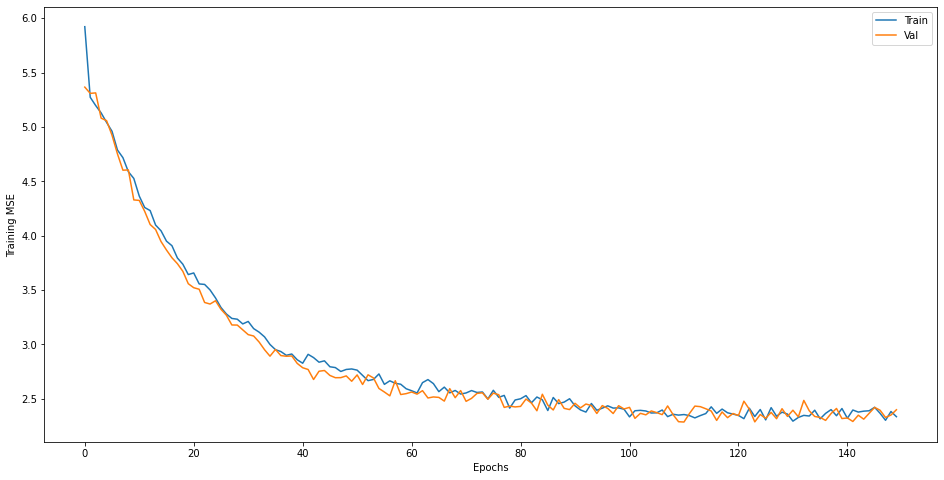

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(losses, label='Train')
plt.plot(val_losses, label='Val')
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.legend()
plt.show()

## Se entiende que el modelo es demasiado simple para caer en en un overfitting, por lo tanto con el set de entrenamiento es suficiente para que haga un fit correcto. Se podria disminuir el set de entrenamiento, pero en este caso ya esta al 70 porciento, no creo que siendo menor, mejore.

# Punto 3 
Descargar el dataset desde el siguiente link. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).


## Preprocesamiento

In [ ]:
ds2=pd.read_csv("drive/MyDrive/dataset_2.csv")
ds2.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
ds2=ds2.drop(columns=["Product_Category_3"])

In [ ]:
linearR = LinearRegression()
logisticR = LogisticRegression()
columns=["User_ID","Occupation","Marital_Status","Product_Category_1","Product_Category_2"]

imp = IterativeImputer(n_nearest_features=4,estimator=linearR,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
ds2[columns]=imp.fit_transform(ds2[columns])

[IterativeImputer] Completing matrix with shape (550068, 5)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.45
[IterativeImputer] Change: 13.265779264699173, scaled tolerance: 1006.0400000000001 
[IterativeImputer] Early stopping criterion reached.


In [ ]:
for i in columns:
  ds2 = ds2.astype({i: int})
ds2 = ds2.astype({"Occupation": int})

In [ ]:
ds2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,16,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,13,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,23,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,22,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,23,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,22,365


In [ ]:
ds2['Big_Purchase'] = ds2.Purchase>9000
ds2 = ds2.astype({"Big_Purchase": int})

In [ ]:
stringColumns=["Gender","Age","City_Category","Stay_In_Current_City_Years"]
for column in stringColumns:
  one_hot = pd.get_dummies(ds2[column],prefix=column)
  # Drop column B as it is now encoded
  ds2 = ds2.drop(column,axis = 1)
  # Join the encoded df
  ds2 = ds2.join(one_hot)
ds2  

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Big_Purchase,Gender_F,Gender_M,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,10,0,3,8,8370,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,1000001,P00248942,10,0,1,6,15200,1,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1000001,P00087842,10,0,12,16,1422,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,1000001,P00085442,10,0,12,14,1057,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1000002,P00285442,16,0,8,13,7969,0,0,1,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,13,1,20,23,368,0,0,1,...,1,0,0,1,0,0,1,0,0,0
550064,1006035,P00375436,1,0,20,22,371,0,1,0,...,0,0,0,0,1,0,0,0,1,0
550065,1006036,P00375436,15,1,20,23,137,0,1,0,...,0,0,0,1,0,0,0,0,0,1
550066,1006038,P00375436,1,0,20,22,365,0,1,0,...,0,1,0,0,1,0,0,1,0,0


## A
Entrenar un modelo de deep learning que no utilice embeddings

In [ ]:
ds2=ds2.drop(columns=["Purchase"])
ds3=ds2.copy()
ds3=ds3.drop(columns=["User_ID","Product_ID"])

In [ ]:
random_state=25

In [ ]:
X=ds3.drop(columns=["Big_Purchase"])
Y=ds3[["Big_Purchase"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, random_state=random_state)
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [ ]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(385047, 21)
(385047, 1)
(165021, 21)
(165021, 1)


In [ ]:
train_dataset_fulll = TensorDataset( Tensor(X_train), Tensor(Y_train) )
test_dataset_fulll = TensorDataset( Tensor(X_test), Tensor(Y_test) )
dataloader = {
    'train': torch.utils.data.DataLoader(train_dataset_fulll, batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(test_dataset_fulll, batch_size=64, shuffle=False, pin_memory=True)
}

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(21, 15) 
        self.fc2 = nn.Linear(15, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x





In [ ]:
def fit(model, dataloader,criterion,optimizer, epochs=5):
    model.to(device)
    losses = []
    val_losses = []
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            #X = X.float()
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            ####
            #acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            acc = (len(y) - (y - y_hat.abs()).abs().sum().item()) / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                #X = X.float()
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (len(y) - (y - y_hat.abs()).abs().sum().item()) / len(y)
                #acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
         # early stopping
        #if early_stopping(train_loss[-1], val_loss[-1], min_delta=10, tolerance = 20):
        #  print("We are at epoch:", epoch)
        #  break
        losses.append(np.mean(train_loss))
        val_losses.append(np.mean(val_loss))
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc)}:.5f")
    return losses,val_losses

In [ ]:
net=Net()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
criterion = torch.nn.BCELoss()

In [ ]:
losses,val_losses=fit(net, dataloader,criterion,optimizer, epochs=20)

  0%|          | 0/6017 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
val_loss 0.43031 val_acc 0.70731: 100%|██████████| 2579/2579 [00:11<00:00, 222.96it/s]


Epoch 1/20 loss 0.48335 val_loss 0.43031 acc 0.68049 val_acc 0.7073059681317297:.5f


val_loss 0.39400 val_acc 0.73512: 100%|██████████| 2579/2579 [00:12<00:00, 206.98it/s]


Epoch 2/20 loss 0.40857 val_loss 0.39400 acc 0.72362 val_acc 0.7351244420446332:.5f


val_loss 0.38288 val_acc 0.74640: 100%|██████████| 2579/2579 [00:11<00:00, 225.55it/s]


Epoch 3/20 loss 0.38983 val_loss 0.38288 acc 0.73775 val_acc 0.7463993701287723:.5f


val_loss 0.37927 val_acc 0.74765: 100%|██████████| 2579/2579 [00:12<00:00, 208.48it/s]


Epoch 4/20 loss 0.38149 val_loss 0.37927 acc 0.74505 val_acc 0.7476507775358302:.5f


val_loss 0.37802 val_acc 0.76507: 100%|██████████| 2579/2579 [00:11<00:00, 220.99it/s]


Epoch 5/20 loss 0.37543 val_loss 0.37802 acc 0.75091 val_acc 0.7650672660972231:.5f


val_loss 0.36985 val_acc 0.75710: 100%|██████████| 2579/2579 [00:11<00:00, 233.08it/s]


Epoch 6/20 loss 0.37331 val_loss 0.36985 acc 0.75349 val_acc 0.757099241315657:.5f


val_loss 0.37085 val_acc 0.74899: 100%|██████████| 2579/2579 [00:11<00:00, 229.83it/s]


Epoch 7/20 loss 0.37153 val_loss 0.37085 acc 0.75518 val_acc 0.7489928034373555:.5f


val_loss 0.37018 val_acc 0.75620: 100%|██████████| 2579/2579 [00:10<00:00, 235.80it/s]


Epoch 8/20 loss 0.37062 val_loss 0.37018 acc 0.75643 val_acc 0.75619505621536:.5f


val_loss 0.36742 val_acc 0.76330: 100%|██████████| 2579/2579 [00:11<00:00, 227.66it/s]


Epoch 9/20 loss 0.36950 val_loss 0.36742 acc 0.75727 val_acc 0.7633029444546408:.5f


val_loss 0.36715 val_acc 0.75875: 100%|██████████| 2579/2579 [00:11<00:00, 224.65it/s]


Epoch 10/20 loss 0.36898 val_loss 0.36715 acc 0.75800 val_acc 0.7587536321350868:.5f


val_loss 0.36646 val_acc 0.75636: 100%|██████████| 2579/2579 [00:11<00:00, 226.04it/s]


Epoch 11/20 loss 0.36794 val_loss 0.36646 acc 0.75889 val_acc 0.75636003940026:.5f


val_loss 0.36522 val_acc 0.75743: 100%|██████████| 2579/2579 [00:11<00:00, 229.43it/s]


Epoch 12/20 loss 0.36710 val_loss 0.36522 acc 0.75992 val_acc 0.757432362237433:.5f


val_loss 0.36984 val_acc 0.77249: 100%|██████████| 2579/2579 [00:10<00:00, 236.99it/s]


Epoch 13/20 loss 0.36638 val_loss 0.36984 acc 0.76062 val_acc 0.7724897155411412:.5f


val_loss 0.36418 val_acc 0.76204: 100%|██████████| 2579/2579 [00:10<00:00, 234.94it/s]


Epoch 14/20 loss 0.36578 val_loss 0.36418 acc 0.76127 val_acc 0.762040339979825:.5f


val_loss 0.36386 val_acc 0.76287: 100%|██████████| 2579/2579 [00:11<00:00, 224.51it/s]


Epoch 15/20 loss 0.36498 val_loss 0.36386 acc 0.76185 val_acc 0.7628715552780226:.5f


val_loss 0.36335 val_acc 0.76585: 100%|██████████| 2579/2579 [00:10<00:00, 236.39it/s]


Epoch 16/20 loss 0.36446 val_loss 0.36335 acc 0.76233 val_acc 0.7658514718503033:.5f


val_loss 0.36320 val_acc 0.75786: 100%|██████████| 2579/2579 [00:11<00:00, 227.88it/s]


Epoch 17/20 loss 0.36410 val_loss 0.36320 acc 0.76278 val_acc 0.7578606456892739:.5f


val_loss 0.36593 val_acc 0.76350: 100%|██████████| 2579/2579 [00:11<00:00, 218.34it/s]


Epoch 18/20 loss 0.36378 val_loss 0.36593 acc 0.76305 val_acc 0.7635016375373741:.5f


val_loss 0.36202 val_acc 0.76486: 100%|██████████| 2579/2579 [00:11<00:00, 234.25it/s]


Epoch 19/20 loss 0.36322 val_loss 0.36202 acc 0.76350 val_acc 0.7648600086686739:.5f


val_loss 0.36267 val_acc 0.76812: 100%|██████████| 2579/2579 [00:11<00:00, 228.67it/s]

Epoch 20/20 loss 0.36290 val_loss 0.36267 acc 0.76384 val_acc 0.7681151227292985:.5f


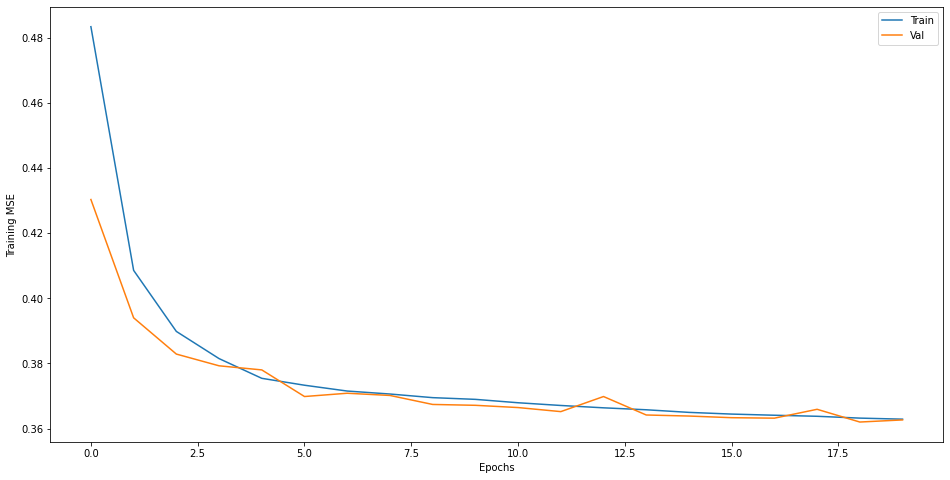

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(losses, label='Train')
plt.plot(val_losses, label='Val')
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.legend()
plt.show()

In [ ]:
losses_noEMB=np.copy(losses)


val_losses_noEMB=np.copy(val_losses)

net_noEMB=net

## B
Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing

In [ ]:
ds2

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Big_Purchase,Gender_F,Gender_M,Age_0-17,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,10,0,3,8,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1,1000001,P00248942,10,0,1,6,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1000001,P00087842,10,0,12,16,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,1000001,P00085442,10,0,12,14,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,1000002,P00285442,16,0,8,13,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,13,1,20,23,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
550064,1006035,P00375436,1,0,20,22,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
550065,1006036,P00375436,15,1,20,23,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
550066,1006038,P00375436,1,0,20,22,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
user_id = ds2["User_ID"]
unique=np.unique(user_id)
# map user id a user index 
index = np.arange(0, len(unique)) # [0,1,...,499]
user_id_to_index = {key:value for key, value in zip(unique, index)}

user_idx = np.array([user_id_to_index[v] for v in user_id])

In [ ]:
user_id = ds2["Product_ID"]
unique=np.unique(user_id)
# map user id a user index 
index = np.arange(0, len(unique)) # [0,1,...,499]
user_id_to_index = {key:value for key, value in zip(unique, index)}

product_idx = np.array([user_id_to_index[v] for v in user_id])

In [ ]:
user_idx,product_idx

(array([   0,    0,    0, ..., 5886, 5888, 5889]),
 array([ 672, 2376,  852, ..., 3568, 3568, 3566]))

In [ ]:
random_state=25

In [ ]:
X=ds2.drop(columns=["Big_Purchase","User_ID","Product_ID"])
Y=ds2[["Big_Purchase"]]


In [ ]:
user_idx_train, user_idx_test, Y_train, Y_test = train_test_split(user_idx, Y, train_size=0.70, random_state=random_state)
product_idx_train, product_idx_test, Y_train, Y_test = train_test_split(product_idx, Y, train_size=0.70, random_state=random_state)

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, random_state=random_state)
#X_train=np.array(X_train)
#X_test=np.array(X_test)
#Y_train=np.array(Y_train)
#Y_test=np.array(Y_test)

In [ ]:
#scaler = StandardScaler()
#X_train=scaler.fit_transform(X_train)

In [ ]:

#X_test=scaler.transform(X_test)

In [ ]:
#train_dataset_fulll = TensorDataset( Tensor(X_train.astype(int)), Tensor(Y_train) )
#test_dataset_fulll = TensorDataset( Tensor(X_test.astype(int)), Tensor(Y_test) )
#dataloader = {
#    'train': torch.utils.data.DataLoader(train_dataset_fulll, batch_size=64, shuffle=True, pin_memory=True),
#    'test': torch.utils.data.DataLoader(test_dataset_fulll, batch_size=64, shuffle=False, pin_memory=True)
#}

In [ ]:
class Net_Embeddings(nn.Module):

    def __init__(self,num_users,num_prods,d_users,d_prods):
        super(Net_Embeddings, self).__init__()
        self.embedding_user = torch.nn.Embedding(num_embeddings=num_users, embedding_dim=d_users)
        self.embedding_prod = torch.nn.Embedding(num_embeddings=num_prods, embedding_dim=d_prods)
        self.fc1 = nn.Linear(21+d_prods+d_users, 15)
        self.drop1 = nn.Dropout(p=0.4) 
        self.fc2 = nn.Linear(15, 10)
        self.drop2 = nn.Dropout(p=0.4)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x, user_idx,prods_idx):
        user_emb = self.embedding_user(user_idx)
        prods_emb = self.embedding_user(prods_idx)
        final_input = torch.cat([x, user_emb,prods_emb], dim=1)       
        x = F.relu(self.fc1(final_input))
        #x = self.drop1(x)
        x = F.relu(self.fc2(x))
        #x = self.drop2(x)
        x = F.sigmoid(self.fc3(x))
        return x


In [ ]:
net=Net_Embeddings(len(user_idx_train),len(product_idx_train),16,16)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3,weight_decay=1e-5)
criterion = torch.nn.BCELoss()
user_idx = np.array([user_id_to_index[v] for v in user_id])

In [ ]:
def fit_emb(model, dataloader,criterion,optimizer,user_idx_train,product_idx_train,user_idx_test,product_idx_test, epochs=5):
    model.to(device)
    losses = []
    val_losses = []
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        batchCounter=0
        for batch in bar:
            X, y = batch
            user_ids=user_idx_train[batchCounter*64:(batchCounter+1)*64]
            prduct_ids=product_idx_train[batchCounter*64:(batchCounter+1)*64]  
            batchCounter+=1         
            user_ids=user_ids.to(device)
            prduct_ids=prduct_ids.to(device)
            #X = X.float()
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X,user_ids,prduct_ids)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            ####
            #acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            acc = (len(y) - (y - y_hat.abs()).abs().sum().item()) / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        batchCounterVar=0
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                #X = X.float()
                user_ids=user_idx_test[batchCounterVar*64:(batchCounterVar+1)*64]
                user_ids=user_ids.to(device)
                prduct_ids=product_idx_test[batchCounterVar*64:(batchCounterVar+1)*64]
                prduct_ids=prduct_ids.to(device)
                X, y = X.to(device), y.to(device)
                y_hat = model(X,user_ids,prduct_ids)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (len(y) - (y - y_hat.abs()).abs().sum().item()) / len(y)
                #acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                batchCounterVar+=1
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
         # early stopping
        #if early_stopping(train_loss[-1], val_loss[-1], min_delta=10, tolerance = 20):
        #  print("We are at epoch:", epoch)
        #  break
        
        losses.append(np.mean(train_loss))
        val_losses.append(np.mean(val_loss))
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")
    return losses,val_losses

In [ ]:
user_idx_train=torch.Tensor(user_idx_train).long()
user_idx_test=torch.Tensor(user_idx_test).long()
product_idx_train=torch.Tensor(product_idx_train).long()
product_idx_test=torch.Tensor(product_idx_test).long()


In [ ]:
#np.bincount(Y_train.reshape(-1))

In [ ]:
#np.bincount(Y_test.reshape(-1))

In [ ]:
losses,val_losses=fit_emb(net, dataloader,criterion,optimizer,user_idx_train,product_idx_train,user_idx_test,product_idx_test, epochs=20)

  0%|          | 0/6017 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
val_loss 0.39286 val_acc 0.72933: 100%|██████████| 2579/2579 [00:12<00:00, 213.63it/s]


Epoch 1/20 loss 0.45215 val_loss 0.39286 acc 0.69631 val_acc 0.72933


val_loss 0.37657 val_acc 0.75010: 100%|██████████| 2579/2579 [00:12<00:00, 212.61it/s]


Epoch 2/20 loss 0.38125 val_loss 0.37657 acc 0.74741 val_acc 0.75010


val_loss 0.37417 val_acc 0.76630: 100%|██████████| 2579/2579 [00:11<00:00, 219.95it/s]


Epoch 3/20 loss 0.37411 val_loss 0.37417 acc 0.75441 val_acc 0.76630


val_loss 0.37250 val_acc 0.75367: 100%|██████████| 2579/2579 [00:12<00:00, 213.18it/s]


Epoch 4/20 loss 0.37231 val_loss 0.37250 acc 0.75624 val_acc 0.75367


val_loss 0.37018 val_acc 0.75066: 100%|██████████| 2579/2579 [00:12<00:00, 205.36it/s]


Epoch 5/20 loss 0.37121 val_loss 0.37018 acc 0.75717 val_acc 0.75066


val_loss 0.36991 val_acc 0.76137: 100%|██████████| 2579/2579 [00:12<00:00, 212.39it/s]


Epoch 6/20 loss 0.37028 val_loss 0.36991 acc 0.75797 val_acc 0.76137


val_loss 0.37057 val_acc 0.76018: 100%|██████████| 2579/2579 [00:11<00:00, 216.36it/s]


Epoch 7/20 loss 0.36949 val_loss 0.37057 acc 0.75869 val_acc 0.76018


val_loss 0.37254 val_acc 0.74764: 100%|██████████| 2579/2579 [00:12<00:00, 210.21it/s]


Epoch 8/20 loss 0.36835 val_loss 0.37254 acc 0.75954 val_acc 0.74764


val_loss 0.36666 val_acc 0.75836: 100%|██████████| 2579/2579 [00:11<00:00, 224.77it/s]


Epoch 9/20 loss 0.36763 val_loss 0.36666 acc 0.76026 val_acc 0.75836


val_loss 0.36567 val_acc 0.76058: 100%|██████████| 2579/2579 [00:11<00:00, 215.29it/s]


Epoch 10/20 loss 0.36682 val_loss 0.36567 acc 0.76099 val_acc 0.76058


val_loss 0.36498 val_acc 0.76168: 100%|██████████| 2579/2579 [00:11<00:00, 218.43it/s]


Epoch 11/20 loss 0.36620 val_loss 0.36498 acc 0.76160 val_acc 0.76168


val_loss 0.36467 val_acc 0.76506: 100%|██████████| 2579/2579 [00:12<00:00, 205.97it/s]


Epoch 12/20 loss 0.36567 val_loss 0.36467 acc 0.76212 val_acc 0.76506


val_loss 0.36489 val_acc 0.76478: 100%|██████████| 2579/2579 [00:12<00:00, 210.47it/s]


Epoch 13/20 loss 0.36520 val_loss 0.36489 acc 0.76247 val_acc 0.76478


val_loss 0.36324 val_acc 0.76039: 100%|██████████| 2579/2579 [00:11<00:00, 220.61it/s]


Epoch 14/20 loss 0.36477 val_loss 0.36324 acc 0.76292 val_acc 0.76039


val_loss 0.36573 val_acc 0.76854: 100%|██████████| 2579/2579 [00:11<00:00, 221.55it/s]


Epoch 15/20 loss 0.36445 val_loss 0.36573 acc 0.76326 val_acc 0.76854


val_loss 0.36629 val_acc 0.76684: 100%|██████████| 2579/2579 [00:12<00:00, 206.75it/s]


Epoch 16/20 loss 0.36434 val_loss 0.36629 acc 0.76347 val_acc 0.76684


val_loss 0.36640 val_acc 0.75176: 100%|██████████| 2579/2579 [00:11<00:00, 221.23it/s]


Epoch 17/20 loss 0.36401 val_loss 0.36640 acc 0.76380 val_acc 0.75176


val_loss 0.36259 val_acc 0.77247: 100%|██████████| 2579/2579 [00:11<00:00, 228.48it/s]


Epoch 18/20 loss 0.36318 val_loss 0.36259 acc 0.76424 val_acc 0.77247


val_loss 0.35940 val_acc 0.75847: 100%|██████████| 2579/2579 [00:12<00:00, 213.70it/s]


Epoch 19/20 loss 0.36047 val_loss 0.35940 acc 0.76535 val_acc 0.75847


val_loss 0.35849 val_acc 0.78127: 100%|██████████| 2579/2579 [00:11<00:00, 215.79it/s]

Epoch 20/20 loss 0.35704 val_loss 0.35849 acc 0.76666 val_acc 0.78127


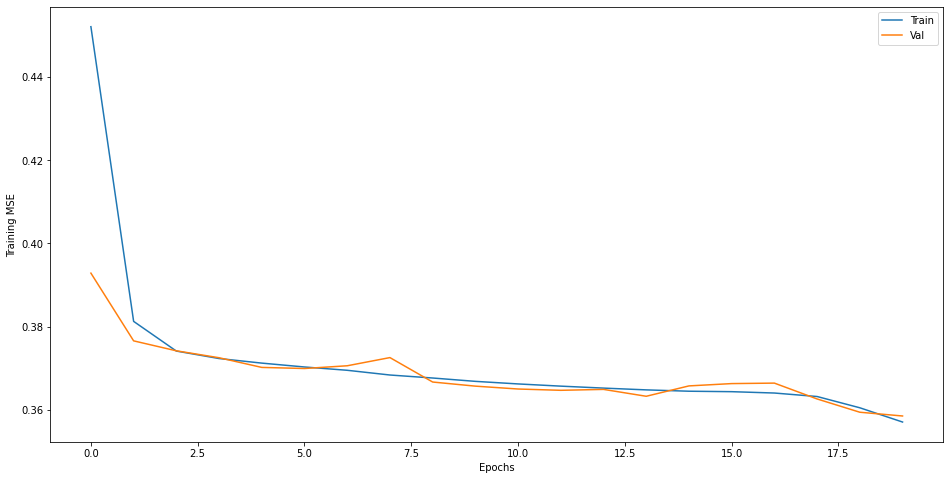

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(losses, label='Train')
plt.plot(val_losses, label='Val')
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.legend()
plt.show()

## C
Compare el score de cada modelo y comente lo necesario.

In [ ]:
#https://www.kaggle.com/code/rsesha/fraud-detection-96-accuracy-very-easy
#Esta funcion nos permite ver la precision y el recall de manera muy rapido
def print_accuracy(modeltype, y_test, y_preds):
    target="isFraud"
    if modeltype == 'Regression':
        from sklearn.metrics import r2_score, mean_squared_error
        print('R-Squared = %0.0f%%' %(100*r2_score(y_test,y_preds)))
        print('RMSE = %0.2f' %np.sqrt(mean_squared_error(y_test,y_preds)))
    else:
        from sklearn.metrics import balanced_accuracy_score, classification_report
        if isinstance(target, str): 
            print('Bal accu %0.0f%%' %(100*balanced_accuracy_score(y_test,y_preds)))
            print(classification_report(y_test,y_preds))
        elif len(target) == 1:
                print('Bal accu %0.0f%%' %(100*balanced_accuracy_score(y_test,y_preds)))
                print(classification_report(y_test,y_preds))
        else:
            for each_i, target_name in enumerate(target):
                print('For %s:' %target_name)
                print('    Bal accu %0.0f%%' %(100*balanced_accuracy_score(y_test.values[:,each_i],y_preds[:,each_i])))
                print(classification_report(y_test.values[:,each_i],y_preds[:,each_i]))

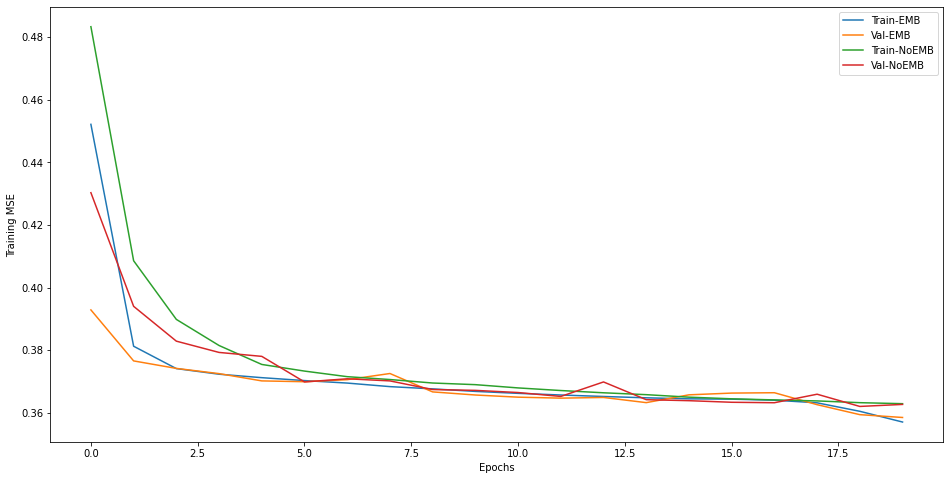

In [ ]:
#Comparacion de resutlados
plt.figure(figsize=(16,8))
plt.plot(losses, label='Train-EMB')
plt.plot(val_losses, label='Val-EMB')
plt.plot(losses_noEMB, label='Train-NoEMB')
plt.plot(val_losses_noEMB, label='Val-NoEMB')
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.legend()
plt.show()


In [ ]:
bar = tqdm(dataloader['test'])
y_hats_noEMB,y_hats_EMB = np.array([]),np.array([])
batchCounterVar=0
with torch.no_grad():
  for batch in bar:
    X, y = batch
    #X = X.float()
    user_ids=user_idx_test[batchCounterVar*64:(batchCounterVar+1)*64]
    user_ids=user_ids.to(device)
    prduct_ids=product_idx_test[batchCounterVar*64:(batchCounterVar+1)*64]
    prduct_ids=prduct_ids.to(device)
    X, y = X.to(device), y.to(device)
    y_hat_EMB = net(X,user_ids,prduct_ids)
    y_hat_noEMB = net_noEMB(X)
    #acc = (len(y) - (y - y_hat.abs()).abs().sum().item()) / len(y)
    #acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
    batchCounterVar+=1
    y_hats_noEMB=np.concatenate((y_hats_noEMB,y_hat_noEMB.detach().cpu().numpy().reshape(1,-1).round().astype(int).flatten()))
    y_hats_EMB=np.concatenate((y_hats_EMB,y_hat_EMB.detach().cpu().numpy().reshape(1,-1).round().astype(int).flatten()))


  0%|          | 0/2579 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 2579/2579 [00:03<00:00, 784.70it/s]


In [ ]:
np.bincount(y_hats_EMB.astype(int)-np.array(Y_test).flatten().astype(int)+1)

array([ 11789, 140372,  12860])

In [ ]:
print_accuracy(None,np.array(Y_test).flatten().astype(int),y_hats_EMB.astype(int))

Bal accu 85%
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     99273
           1       0.81      0.82      0.81     65748

    accuracy                           0.85    165021
   macro avg       0.84      0.85      0.84    165021
weighted avg       0.85      0.85      0.85    165021



In [ ]:
print_accuracy(None,np.array(Y_test).flatten().astype(int),y_hats_noEMB.astype(int))

Bal accu 84%
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     99273
           1       0.81      0.80      0.81     65748

    accuracy                           0.85    165021
   macro avg       0.84      0.84      0.84    165021
weighted avg       0.85      0.85      0.85    165021



Podemos ver que ambos metodos performan correctamente, pero el que tiene embeddings tiene una pequeña ventaja, ya que el f1 score balanceado es 0.85 contra 0.84, tambien podemos ver en la loss que ambos performan muy parecido. Es probable que con mas epochs pueda mejorar la performance, pero ya una precision como la que tenemos ahora es suficiente.

# Punto 4 
Se tiene la función y = a * log(b) + b * c^2. Calcular las derivadas de y respecto a los parámetros a, b, c, evaluando en los valores a=2, b=10, c=0.5. Se deben calcular las derivadas por los siguientes métodos

## D
Utilizando PyTorch (automatic differentiation).

In [ ]:
a=torch.tensor(2., requires_grad=True)
b=torch.tensor(10., requires_grad=True)
c=torch.tensor(0.5, requires_grad=True)

In [ ]:
y=(a*torch.log(b))+(b*torch.pow(c, 2))

In [ ]:
y.backward()

In [ ]:
print(a.grad,b.grad,c.grad)

tensor(2.3026) tensor(0.4500) tensor(10.)
